## **Introduction**

Electric vehicles (EVs) are becoming a key part of the global shift toward clean energy and sustainable transport. This project performs an in-depth analysis on a comprehensive dataset of 478 electric vehicles (EVs) from 2025.
The dataset includes 22 specifications ranging from performance metrics (like range and acceleration) to technical attributes (such as battery type and charging capabilities). The goal is to extract meaningful insights into the current EV market, uncover design trade-offs, and highlight patterns across different segments and technologies.

🎯 Project Objectives:

 - Analyze key performance metrics including range, acceleration, and efficiency to understand market averages.

 - Examine how battery capacity, charging ports, and fast-charging power relate to vehicle performance.

 - Compare EV segments (e.g., economy, luxury, SUV) to reveal differences in design priorities, performance, and technology adoption.

 - Study how drivetrain configurations (FWD, AWD, RWD) and body types vary across market segments and relate to performance metrics.

 - Visualize the market share of top EV brands and assess their positioning based on key metrics.

 - Apply Statistical Testing to determine whether differences in performance, efficiency, and drivetrain distribution across segments are statistically significant.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency, ttest_ind, f_oneway
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [ ]:
# Load the dataset
df = pd.read_csv(r'/content/electric_vehicles_spec_2025.csv.csv')
print('shape:' ,df.shape)

shape: (478, 22)


In [ ]:
df.head(5)

,brand,model,top_speed_kmh,battery_capacity_kWh,battery_type,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,fast_charging_power_kw_dc,fast_charge_port,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type,source_url
0,Abarth,500e Convertible,155,37.8,Lithium-ion,192.0,235.0,156,225,7.0,67.0,CCS,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1904/Abarth-500e-C...
1,Abarth,500e Hatchback,155,37.8,Lithium-ion,192.0,235.0,149,225,7.0,67.0,CCS,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1903/Abarth-500e-H...
2,Abarth,600e Scorpionissima,200,50.8,Lithium-ion,102.0,345.0,158,280,5.9,79.0,CCS,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3057/Abarth-600e-S...
3,Abarth,600e Turismo,200,50.8,Lithium-ion,102.0,345.0,158,280,6.2,79.0,CCS,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3056/Abarth-600e-T...
4,Aiways,U5,150,60.0,Lithium-ion,NaN,310.0,156,315,7.5,78.0,CCS,NaN,496,5,FWD,JC - Medium,4680,1865,1700,SUV,https://ev-database.org/car/1678/Aiways-U5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand                      478 non-null    object 
 1   model                      477 non-null    object 
 2   top_speed_kmh              478 non-null    int64  
 3   battery_capacity_kWh       478 non-null    float64
 4   battery_type               478 non-null    object 
 5   number_of_cells            276 non-null    float64
 6   torque_nm                  471 non-null    float64
 7   efficiency_wh_per_km       478 non-null    int64  
 8   range_km                   478 non-null    int64  
 9   acceleration_0_100_s       478 non-null    float64
 10  fast_charging_power_kw_dc  477 non-null    float64
 11  fast_charge_port           477 non-null    object 
 12  towing_capacity_kg         452 non-null    float64
 13  cargo_volume_l             477 non-null    object 

# **Data Cleaning**

In [ ]:
# Drop source_url
df = df.drop(['source_url'],axis=1)

In [ ]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [ ]:
print("Missing values before cleaning:\n", df.isnull().sum())

Missing values before cleaning:
 brand                          0
model                          1
top_speed_kmh                  0
battery_capacity_kWh           0
battery_type                   0
number_of_cells              202
torque_nm                      7
efficiency_wh_per_km           0
range_km                       0
acceleration_0_100_s           0
fast_charging_power_kw_dc      1
fast_charge_port               1
towing_capacity_kg            26
cargo_volume_l                 1
seats                          0
drivetrain                     0
segment                        0
length_mm                      0
width_mm                       0
height_mm                      0
car_body_type                  0
dtype: int64


In [ ]:
df = df.drop('number_of_cells', axis=1)
df = df.dropna(subset=['model', 'cargo_volume_l', 'fast_charge_port'])

In [ ]:
df = df.fillna(df.median(numeric_only=True))

In [ ]:
print("Missing values after cleaning:\n", df.isnull().sum())

Missing values after cleaning:
 brand                        0
model                        0
top_speed_kmh                0
battery_capacity_kWh         0
battery_type                 0
torque_nm                    0
efficiency_wh_per_km         0
range_km                     0
acceleration_0_100_s         0
fast_charging_power_kw_dc    0
fast_charge_port             0
towing_capacity_kg           0
cargo_volume_l               0
seats                        0
drivetrain                   0
segment                      0
length_mm                    0
width_mm                     0
height_mm                    0
car_body_type                0
dtype: int64


In [ ]:
print(df['fast_charge_port'].unique())
df['fast_charge_port'] = df['fast_charge_port'].str.lower().str.strip()

['CCS' 'CHAdeMO']


In [ ]:
df['range_category'] = pd.cut(df['range_km'], bins=[0,100,200,300,400,500], labels=['Very Low','Low','Medium','High','Very High'])

In [ ]:
print("\n Distribution by Range Category")
print(df['range_category'].value_counts().sort_index())


 Distribution by Range Category
range_category
Very Low       0
Low           14
Medium        81
High         148
Very High    169
Name: count, dtype: int64


# **Exploratory Data Analysis**

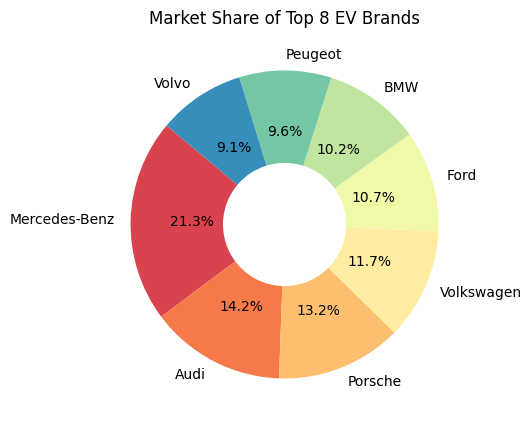

In [ ]:
#  Pie Chart: Market Share of Top Brands
top_brands = df['brand'].value_counts().head(8)
colors = sns.color_palette('Spectral', len(top_brands))

plt.figure(figsize=(5,5))
plt.pie(top_brands, labels=top_brands.index, autopct='%1.1f%%', colors=colors, startangle=140, wedgeprops=dict(width=0.6))
plt.title('Market Share of Top 8 EV Brands')
plt.show()

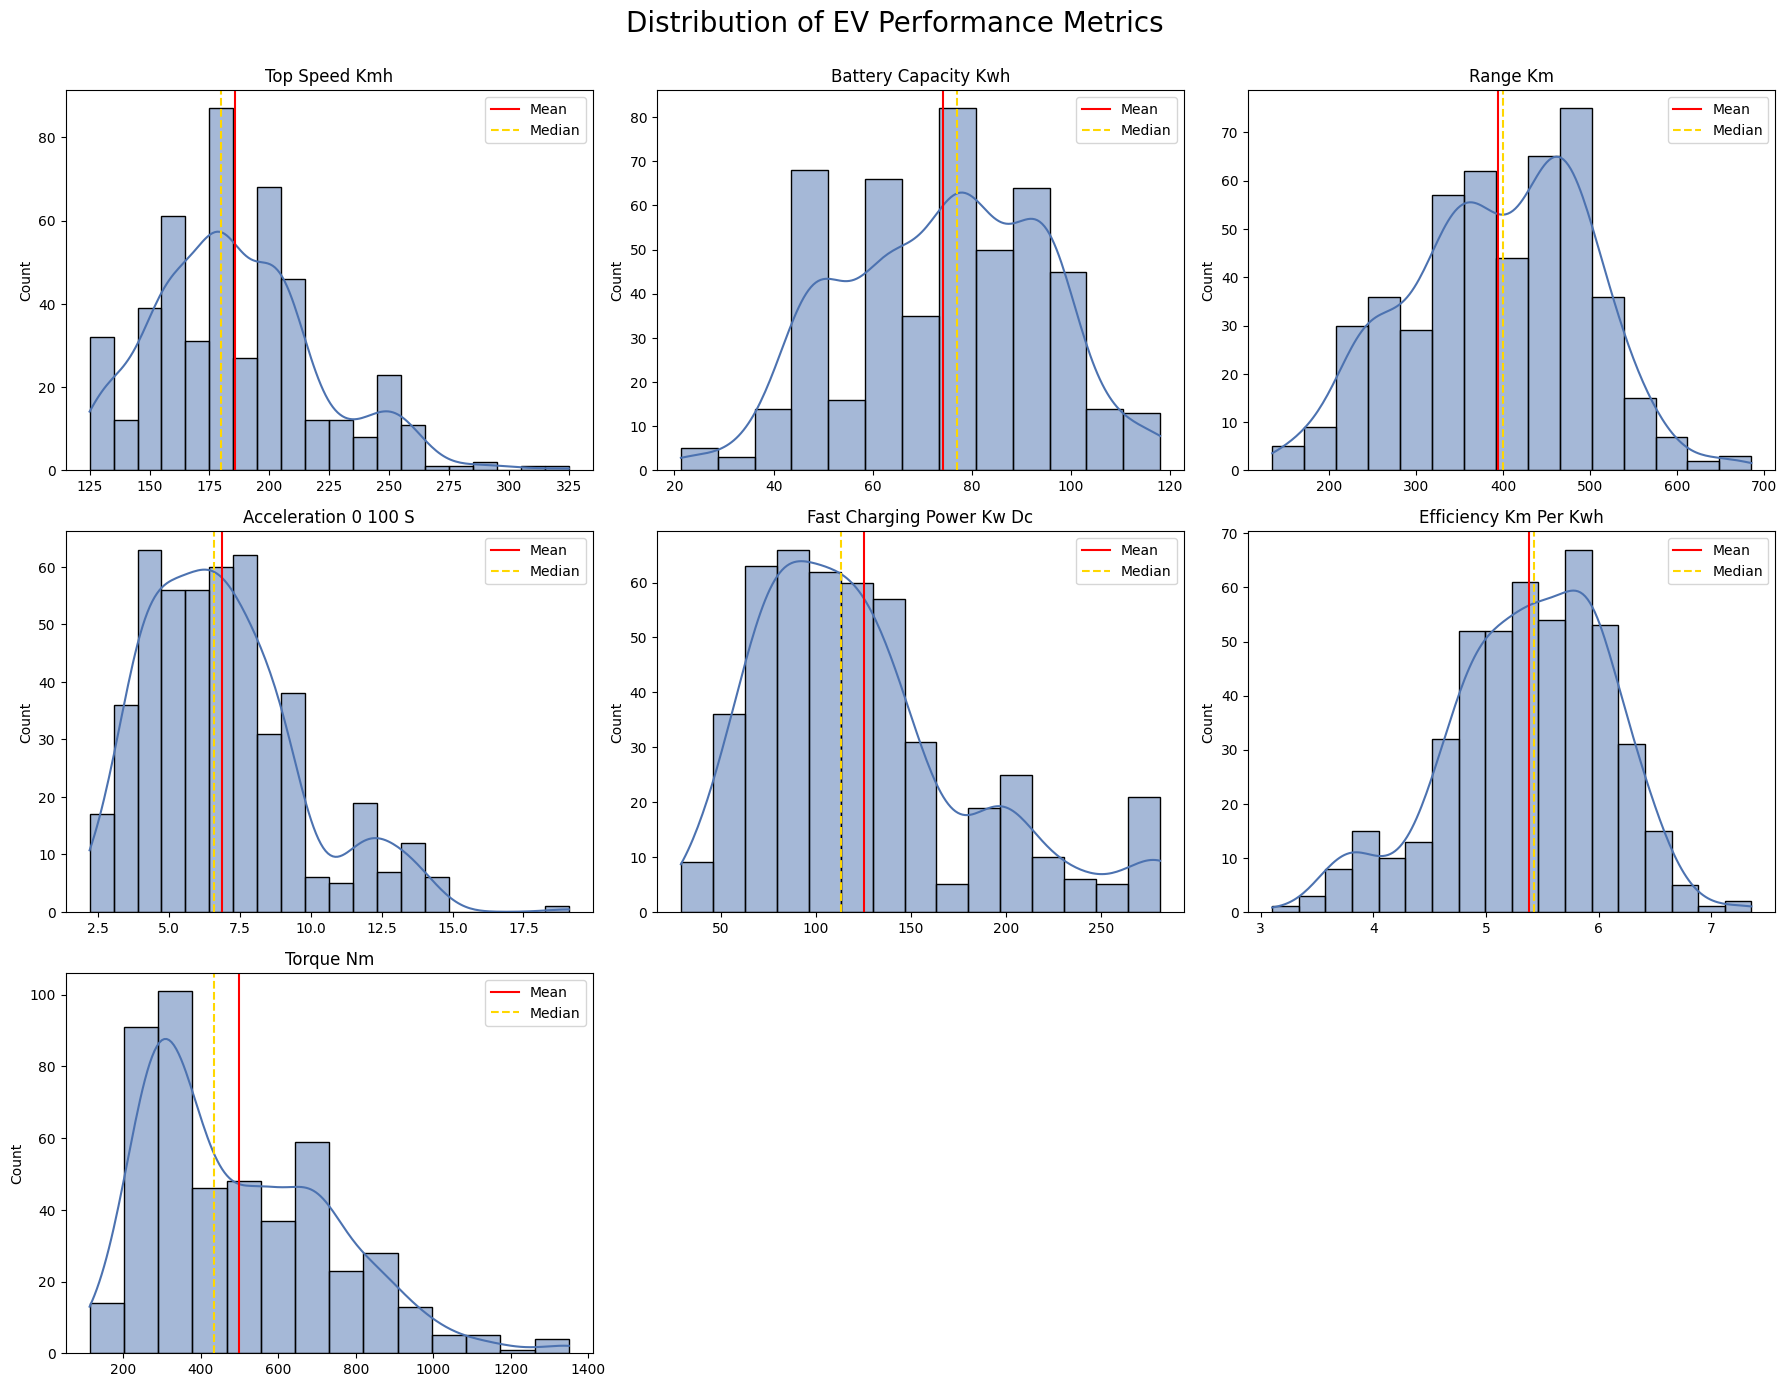

In [ ]:
# Numerical Feature Analysis

# Create energy efficiency metric (range per kWh)
df['efficiency_km_per_kWh'] = df['range_km'] / df['battery_capacity_kWh']

# Define key numerical features to analyze
num_columns = ['top_speed_kmh','battery_capacity_kWh','range_km','acceleration_0_100_s','fast_charging_power_kw_dc','efficiency_km_per_kWh','torque_nm']

plt.figure(figsize=(18, 18))
plt.suptitle('Distribution of EV Performance Metrics', fontsize=20, y=1)

for i, col in enumerate(num_columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[col], color='#4C72B0', kde=True)
    plt.axvline(df[col].mean(), color='red', label='Mean')
    plt.axvline(df[col].median(), color= 'gold', linestyle='--', label='Median')
    plt.title(col.replace('_', ' ').title())
    plt.xlabel('')
    plt.legend()

plt.tight_layout()
plt.show()

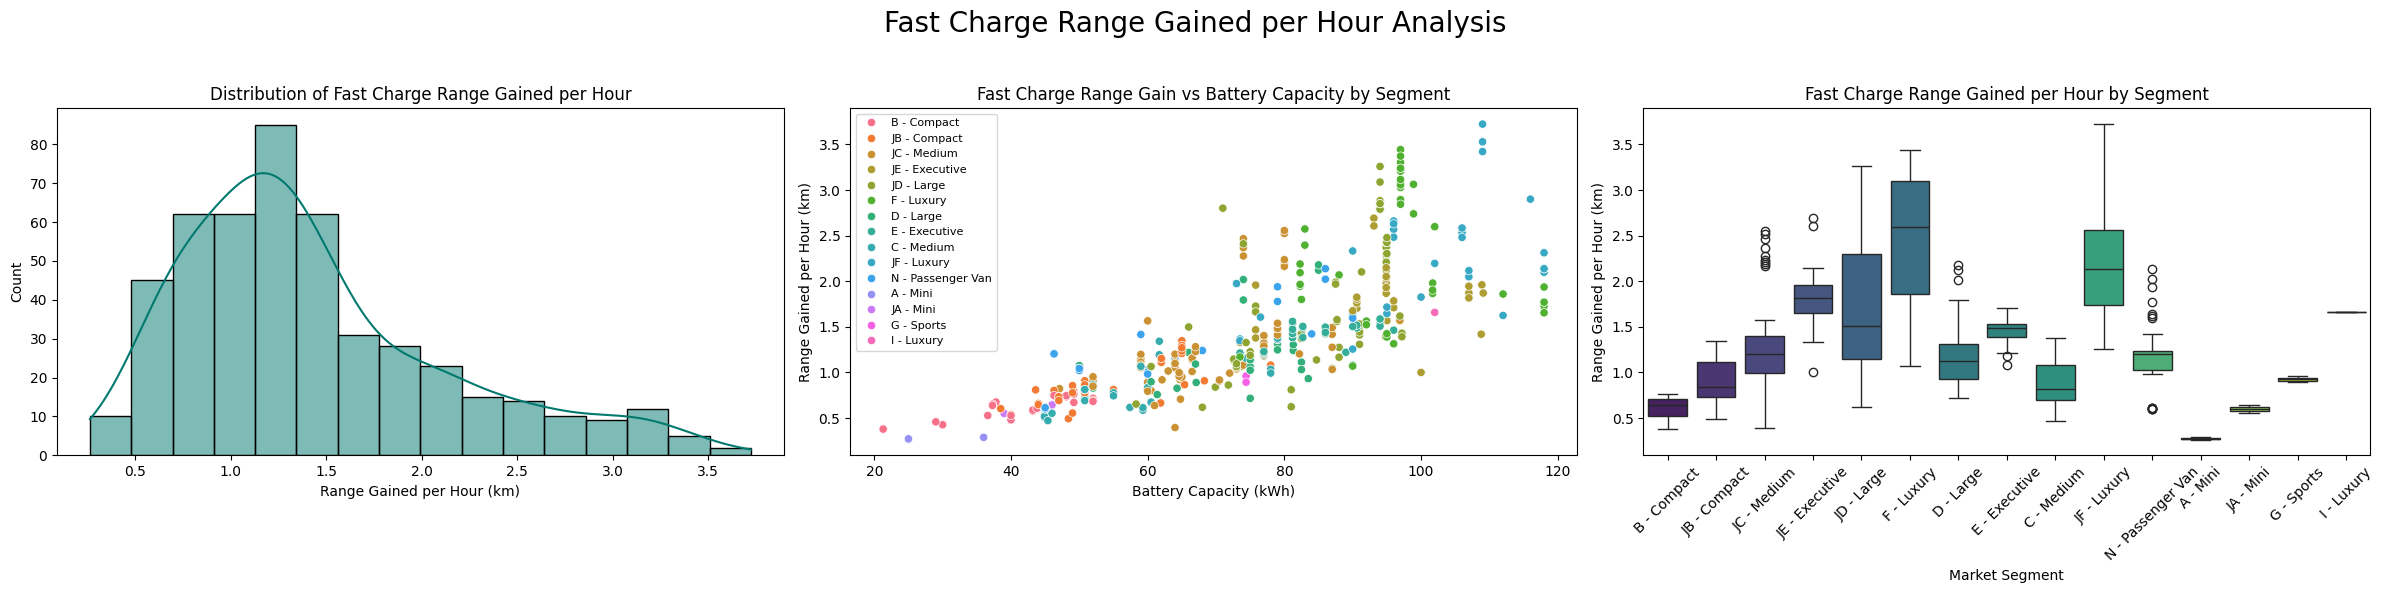

In [ ]:
# Fast charge range gained per hour
df['fast_charge_range_per_hour'] = (df['fast_charging_power_kw_dc'] /
                                   (df['efficiency_km_per_kWh'] * 1000)) * 60

fig, axes = plt.subplots(1, 3, figsize=(24, 6))
fig.suptitle('Fast Charge Range Gained per Hour Analysis', fontsize=20)

# Distribution of Fast Charge Range Gained per Hour
sns.histplot(df['fast_charge_range_per_hour'].dropna(), kde=True, color='#01796f', ax=axes[0])
axes[0].set_title('Distribution of Fast Charge Range Gained per Hour')
axes[0].set_xlabel('Range Gained per Hour (km)')
axes[0].set_ylabel('Count')

# Fast charge range gain vs battery capacity by segment
sns.scatterplot(data=df, x='battery_capacity_kWh', y='fast_charge_range_per_hour', hue='segment', ax=axes[1])
axes[1].set_title('Fast Charge Range Gain vs Battery Capacity by Segment')
axes[1].set_xlabel('Battery Capacity (kWh)')
axes[1].set_ylabel('Range Gained per Hour (km)')
axes[1].legend(loc='best', fontsize=8)

# Fast charge range gain by segment
sns.boxplot(data=df, x='segment', y='fast_charge_range_per_hour', palette='viridis', ax=axes[2])
axes[2].set_title('Fast Charge Range Gained per Hour by Segment')
axes[2].set_xlabel('Market Segment')
axes[2].set_ylabel('Range Gained per Hour (km)')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

brand: 58 unique values
model: 475 unique values
battery_type: 1 unique values
fast_charge_port: 2 unique values
cargo_volume_l: 140 unique values
drivetrain: 3 unique values
segment: 15 unique values
car_body_type: 8 unique values


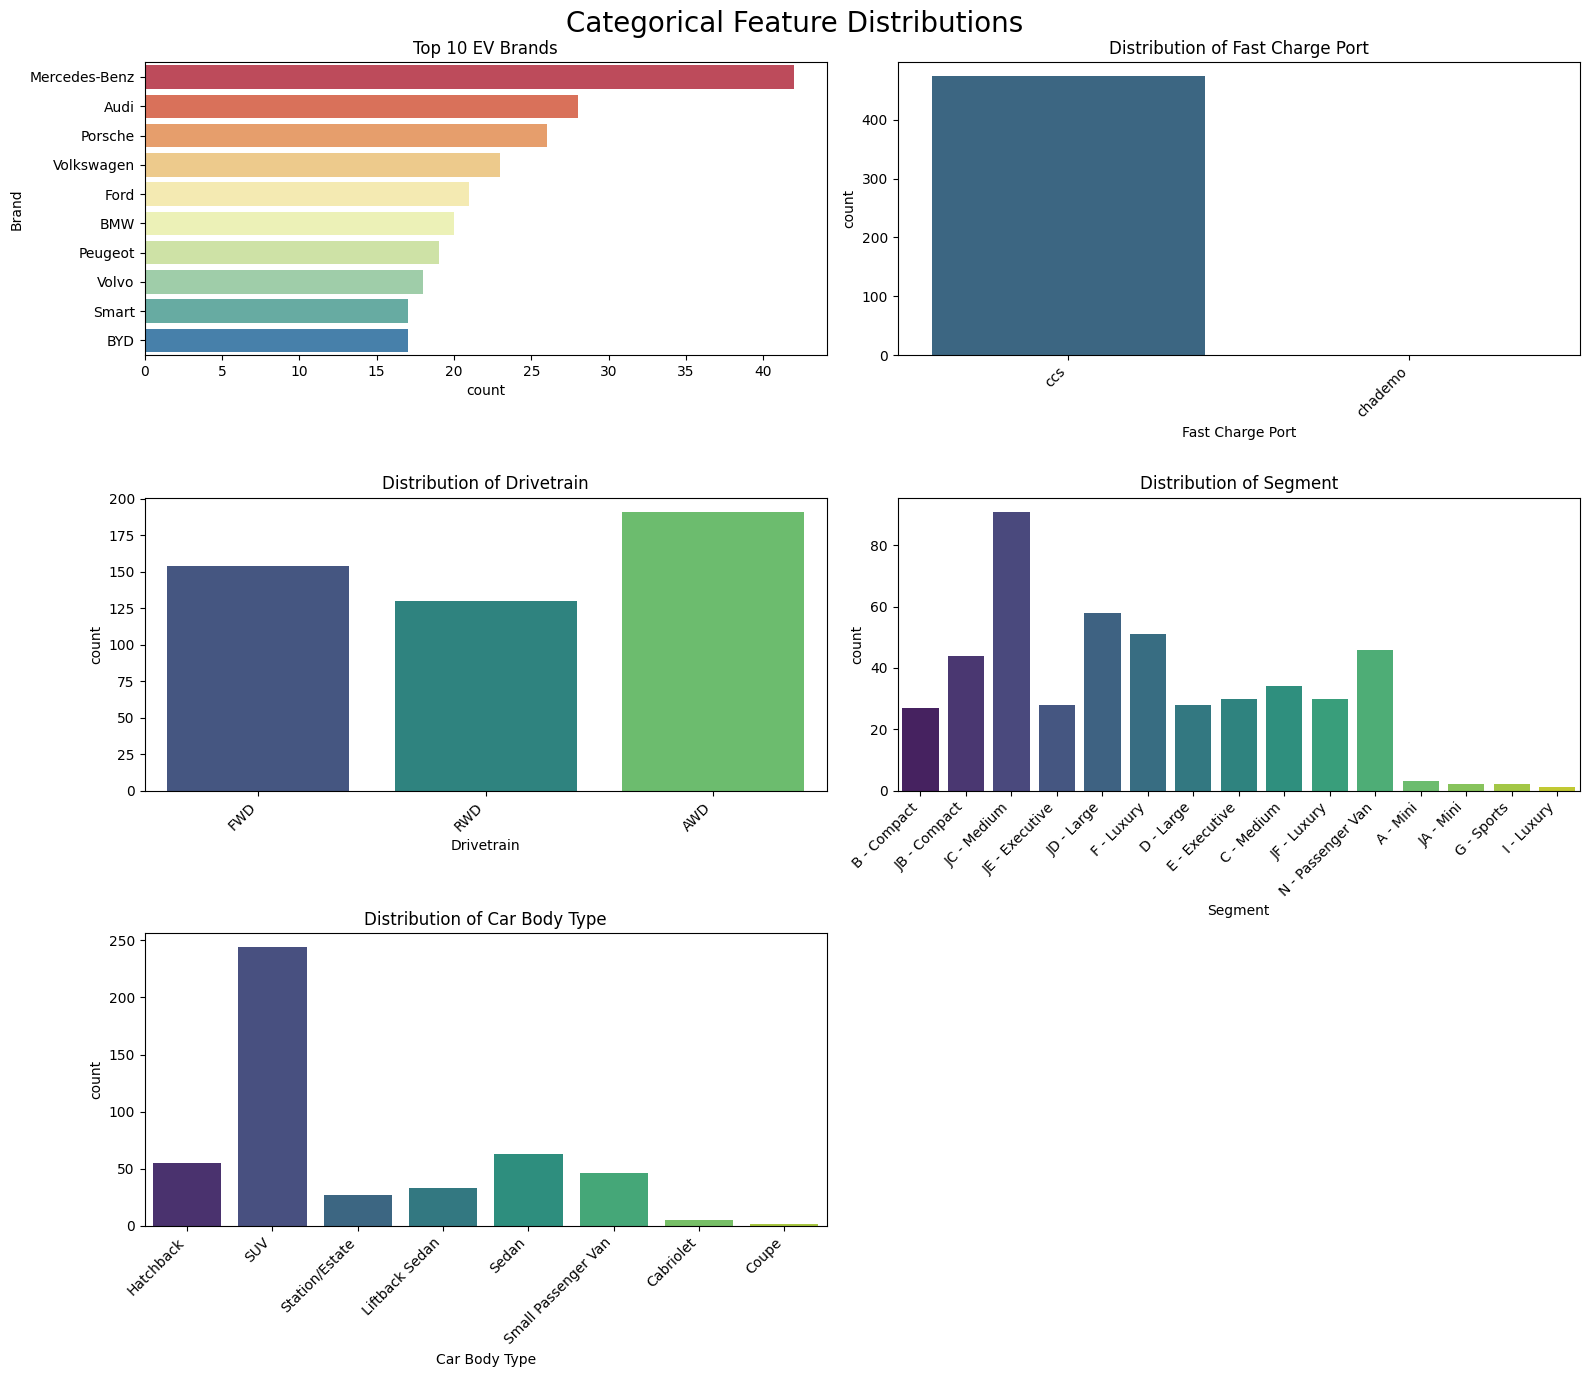

In [ ]:
# Categorical Feature Analysis
cat_features = df.select_dtypes(include='object').columns
for feature in cat_features:
    print(f"{feature}: {df[feature].nunique()} unique values")

cat_features = ['brand', 'fast_charge_port', 'drivetrain', 'segment', 'car_body_type']

# Plot top 10 brands and all others
top_n = 10
plt.figure(figsize=(16, 14))
plt.suptitle('Categorical Feature Distributions', fontsize=20)

for i, feature in enumerate(cat_features, 1):
    plt.subplot(3, 2, i)
    if feature == 'brand':
        top_brands = df[feature].value_counts().nlargest(top_n).index
        sns.countplot(data=df[df[feature].isin(top_brands)], y=feature, order=top_brands, palette="Spectral")
        plt.title(f'Top {top_n} EV Brands')
        plt.ylabel('Brand')
    else:
        sns.countplot(data=df, x=feature, palette="viridis")
        plt.title(f'Distribution of {feature.replace("_", " ").title()}')
        plt.xlabel(feature.replace("_", " ").title())
        plt.xticks(rotation=45, ha='right')

    plt.tight_layout()

plt.show()

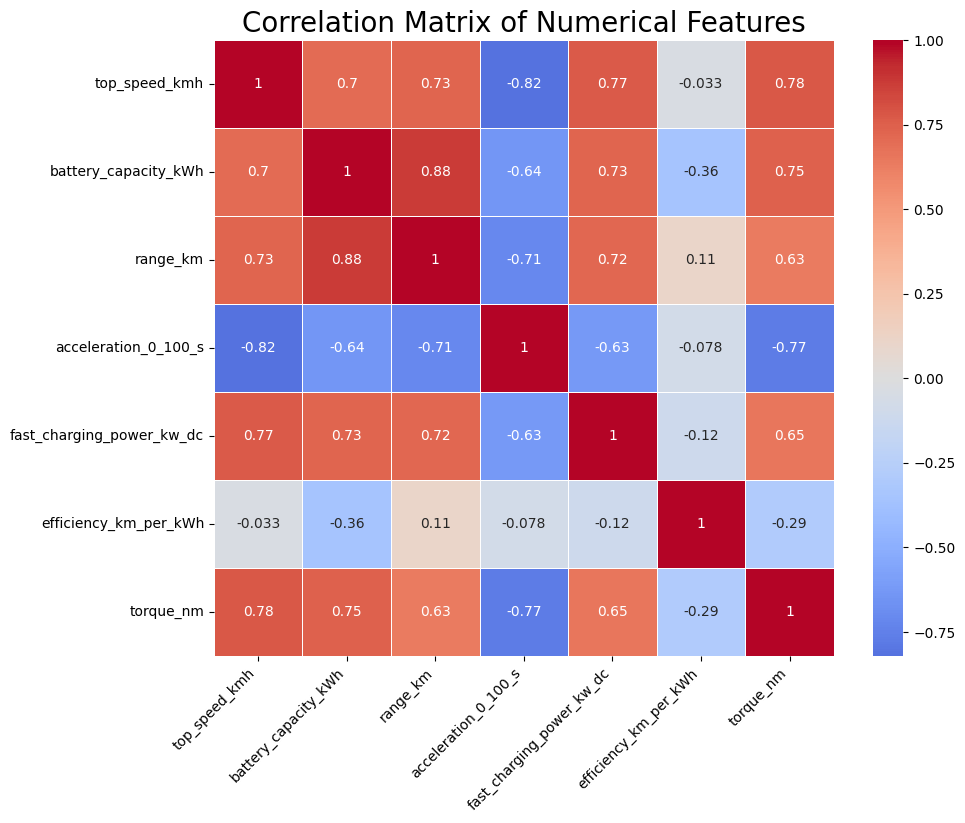

In [ ]:
# Compute correlation matrix
df_corr = df[num_columns].corr(numeric_only=True)

plt.figure(figsize=(10,8))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.xticks(rotation=45, ha='right')
plt.title('Correlation Matrix of Numerical Features', fontsize=20)
plt.show()

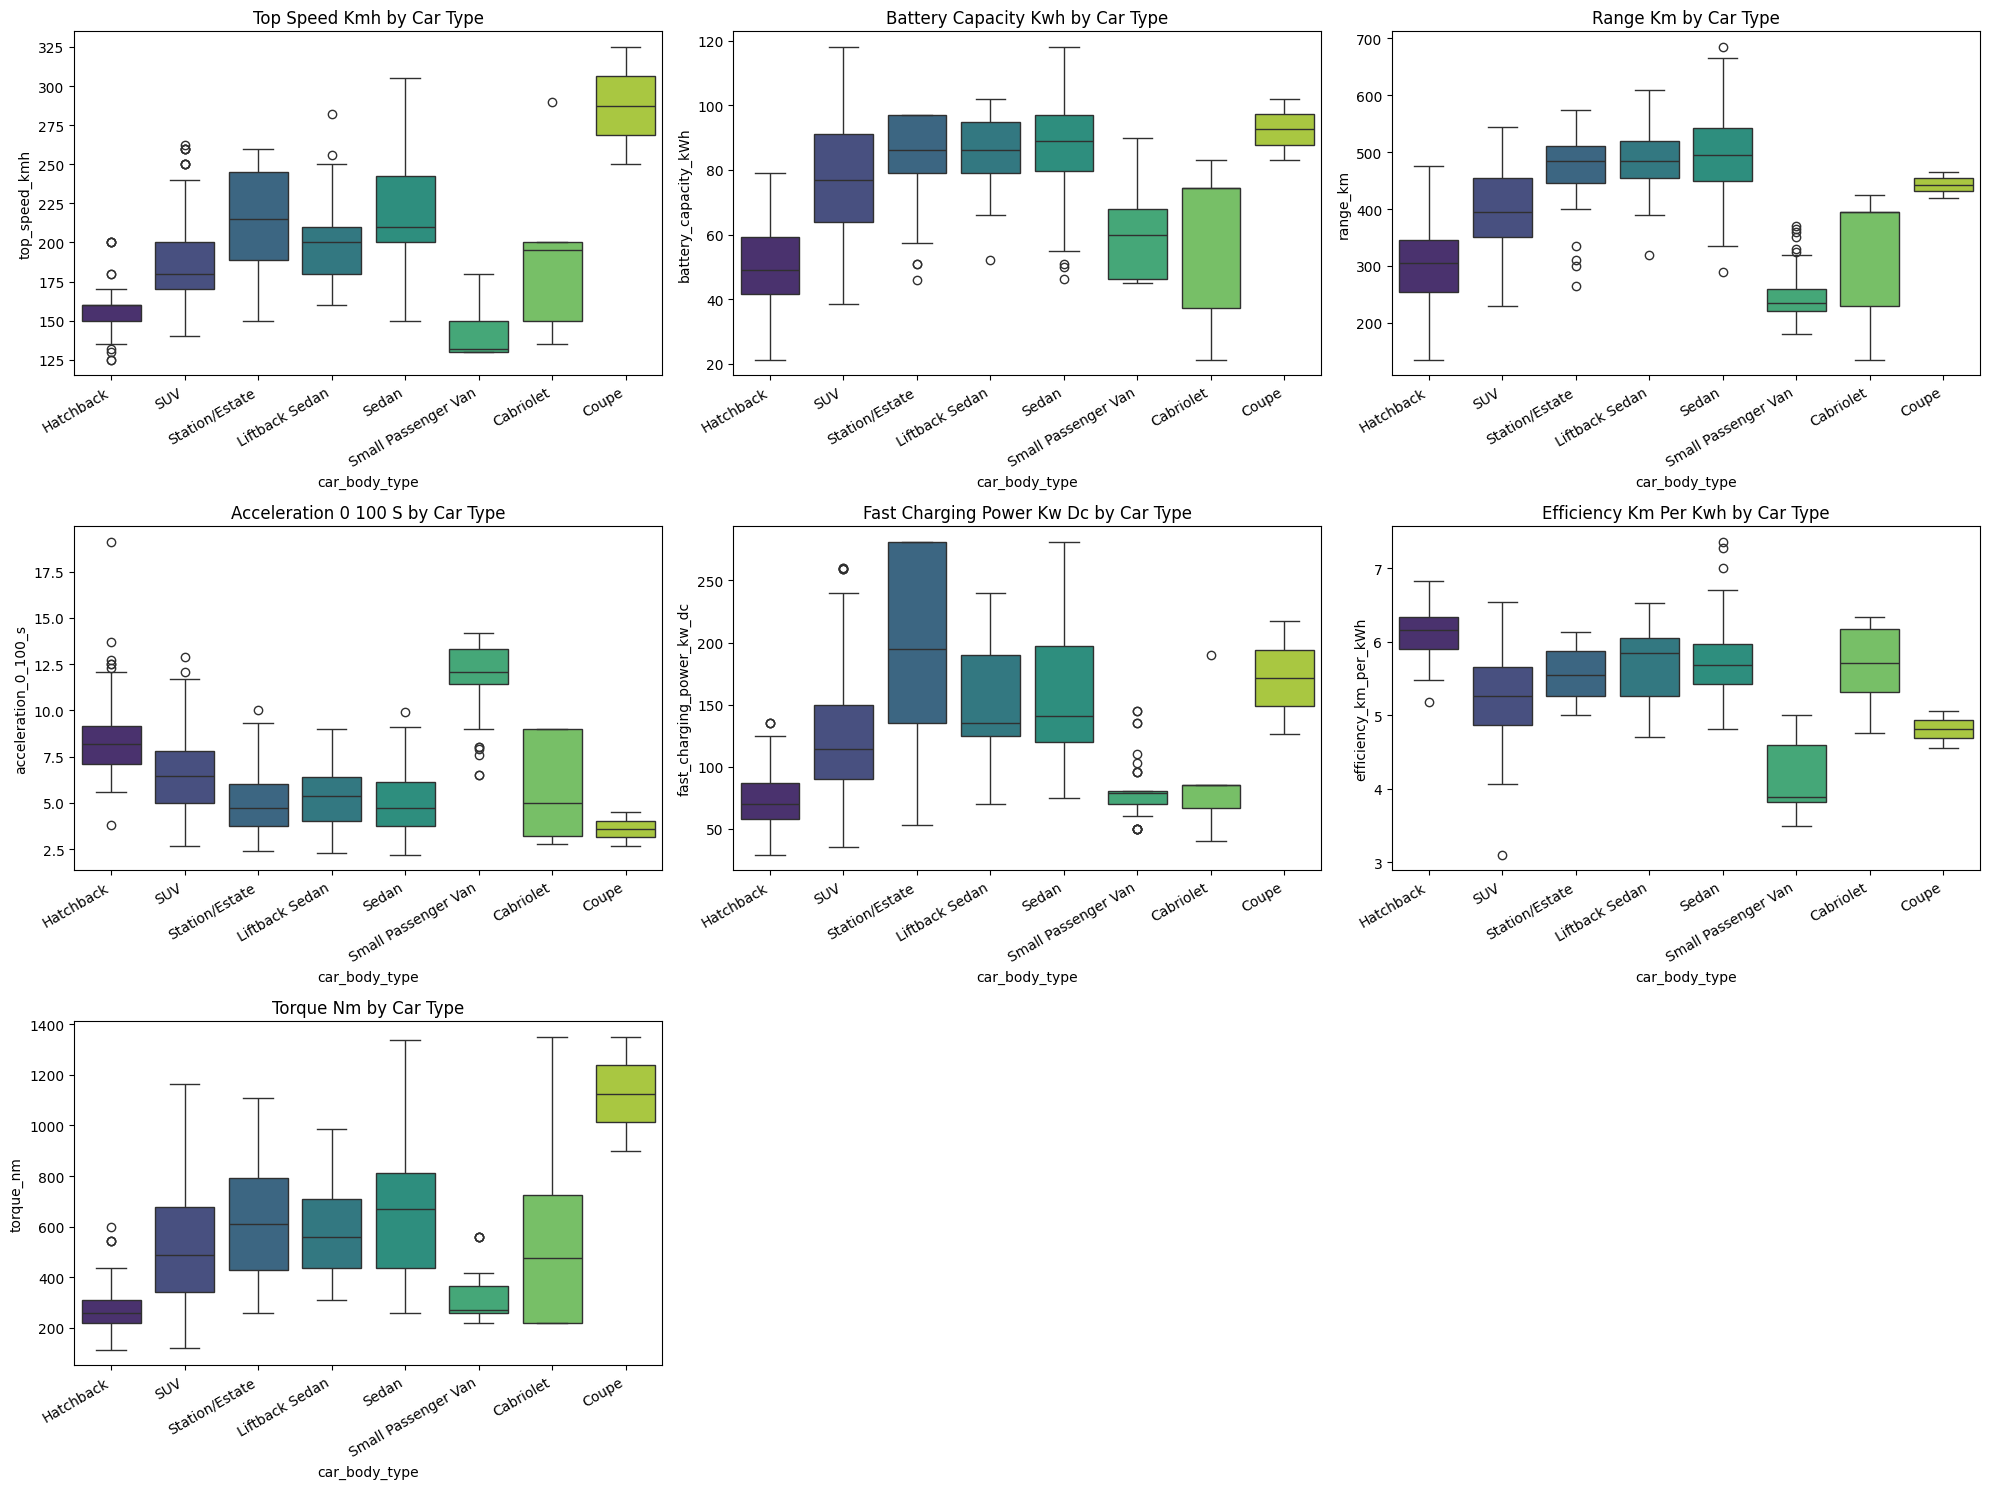

In [ ]:
# Boxplots by Car Body Type
plt.figure(figsize=(20, 15))
for i, feature in enumerate(num_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, y=feature, x='car_body_type', palette='viridis')
    plt.xticks(rotation=30, ha='right')
    plt.title(f'{feature.replace("_", " ").title()} by Car Type')
plt.tight_layout()
plt.show()

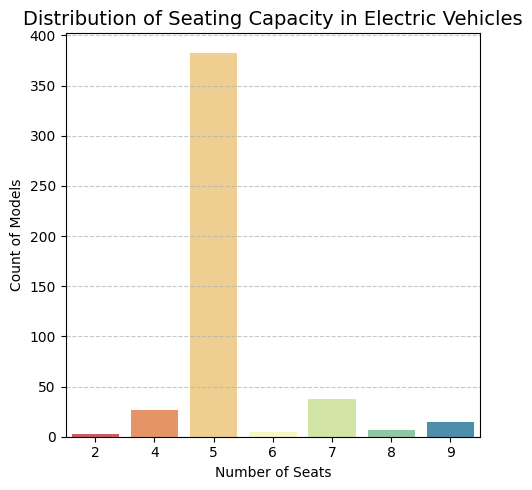

In [ ]:
# Seating Capacity Distribution
plt.figure(figsize=(5, 5))
sns.countplot(data=df, x='seats', palette='Spectral')
plt.title('Distribution of Seating Capacity in Electric Vehicles', fontsize=14)
plt.xlabel('Number of Seats')
plt.ylabel('Count of Models')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# **Statistical Testing**

In [ ]:
# ANOVA: Efficiency by Market Segment
groups = [group['efficiency_km_per_kWh'].dropna() for name, group in df.groupby('segment') if group['efficiency_km_per_kWh'].notna().sum() > 5]

f_stat, p_val = f_oneway(*groups)
print("\n ANOVA TEST: Efficiency across all segments")
print(f"  F-statistic: {f_stat:.2f}, p-value: {p_val:.4f}")
if p_val < 0.05:
    print("  Result: Significant differences in efficiency exists between segments.")
else:
    print("  Result: No significant differences in efficiency is found.")


 ANOVA TEST: Efficiency across all segments
  F-statistic: 89.44, p-value: 0.0000
  Result: Significant differences in efficiency exists between segments.


**Interpretation:**

The ANOVA test yields a very low p-value (<0.0001), so we reject the null hypothesis. This indicates that energy efficiency (km per kWh significantly differs among EV market segments, such as Compact, Executive, and Luxury.

In [ ]:
# Chi-Squared Test: Segment vs Drivetrain
df_chi = df[['segment', 'drivetrain']].dropna()

contingency_table = pd.crosstab(df_chi['segment'], df_chi['drivetrain'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("\n CHI-SQUARED TEST: Segment vs Drivetrain")
print(f"Chi2 Statistic: {chi2:.2f}, p-value: {p:.4f}")
if p < 0.05:
    print("   Result: Significant association between segment and drivetrain.")
else:
    print("   Result: No significant association between segment and drivetrain.")


 CHI-SQUARED TEST: Segment vs Drivetrain
Chi2 Statistic: 274.92, p-value: 0.0000
   Result: Significant association between segment and drivetrain.


**Interpretation:**

The chi-squared test shows a very low p-value, indicating a significant association between EV market segments and drivetrain types. This suggests that drivetrain distribution varies across segments (e.g., FWD, AWD, RWD are more or less common in different segments).


In [ ]:
# ANOVA test: Fast charge range gain across market segments
anova_data = df[['segment', 'fast_charge_range_per_hour']].dropna()
grouped = anova_data.groupby('segment')['fast_charge_range_per_hour'].apply(list)

f_stat, p_val = f_oneway(*grouped)

print(f" ANOVA TEST: F-statistic: {f_stat:.3f}")
print(f"   p-value: {p_val:.4f}")

if p_val < 0.05:
    print("   Result: Significant difference in fast charge gain across segments.")
else:
    print("   Result: No significant difference found.")

 ANOVA TEST: F-statistic: 44.591
   p-value: 0.0000
   Result: Significant difference in fast charge gain across segments.


**Interpretation:**

The ANOVA test shows a very low p-value, indicating significant differences in the average fast charge range gained per hour among different EV market segments. This means that fast charge performance varies depending on the segment.

# **Final Summary**

In [ ]:
print(f"\n📊 DATASET PERFORMANCE SUMMARY")
print("=" * 50)
print(f"Average Range: {df['range_km'].mean():.0f} km")
print(f"Max Range: {df['range_km'].max():.0f} km")
print(f"Average Battery Capacity: {df['battery_capacity_kWh'].mean():.1f} kWh")
print(f"Average Acceleration (0-100 km/h): {df['acceleration_0_100_s'].mean():.1f} seconds")
print(f"Min Acceleration (fastest 0-100 km/h): {df['acceleration_0_100_s'].min():.1f} seconds")
print(f"Average Efficiency: {df['efficiency_wh_per_km'].mean():.0f} Wh/km")
print(f"Most Common Drivetrain: {df['drivetrain'].mode()[0]}")
print(f"Most Popular Segment: {df['segment'].mode()[0]}")

print(f"\n🔋 TECHNOLOGY INSIGHTS")
print("=" * 30)
battery_types = df['battery_type'].value_counts()
print(f"Dominant Battery Technology: {battery_types.index[0]} ({battery_types.iloc[0]/len(df)*100:.1f}%)")

charging_ports = df['fast_charge_port'].value_counts()
print(f"Most Common Charging Port: {charging_ports.index[0]} ({charging_ports.iloc[0]/len(df)*100:.1f}%)")

print(f"\n⚡ CHARGING PERFORMANCE")
print("=" * 30)
print(f"Average Fast Charging Power: {df['fast_charging_power_kw_dc'].mean():.1f} kW")

print(f"\n🚗 VEHICLE DESIGN")
print("=" * 30)
print(f"Most Common Car Body Type: {df['car_body_type'].mode()[0]}")
print(f"Most Common Seating Capacity: {df['seats'].mode()[0]}")

print(f"\n📈 SEGMENT-WISE AVERAGES")
print("=" * 30)
segment_summary = df.groupby('segment')[['efficiency_wh_per_km', 'range_km']].mean().round(1)
print(segment_summary)

print(f"\n🏆 TOP 5 BRANDS MARKET SHARE")
print("=" * 30)
top_brands = df['brand'].value_counts().head(5)
for brand, count in top_brands.items():
    print(f"{brand}: {count/len(df)*100:.1f}%")


📊 DATASET PERFORMANCE SUMMARY
Average Range: 394 km
Max Range: 685 km
Average Battery Capacity: 74.2 kWh
Average Acceleration (0-100 km/h): 6.9 seconds
Min Acceleration (fastest 0-100 km/h): 2.2 seconds
Average Efficiency: 163 Wh/km
Most Common Drivetrain: AWD
Most Popular Segment: JC - Medium

🔋 TECHNOLOGY INSIGHTS
Dominant Battery Technology: Lithium-ion (100.0%)
Most Common Charging Port: ccs (99.8%)

⚡ CHARGING PERFORMANCE
Average Fast Charging Power: 125.2 kW

🚗 VEHICLE DESIGN
Most Common Car Body Type: SUV
Most Common Seating Capacity: 5

📈 SEGMENT-WISE AVERAGES
                   efficiency_wh_per_km  range_km
segment                                          
A - Mini                          119.7     183.3
B - Compact                       129.5     252.2
C - Medium                        137.1     355.0
D - Large                         143.5     447.9
E - Executive                     162.9     478.5
F - Luxury                        176.2     525.0
G - Sports              